In [105]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import sys
import math

In [106]:
df = pd.read_csv('Flight_Data.csv')

In [107]:
Geographical_map = nx.Graph()

In [108]:
df

,Airline,SourceAirport,DestinationAirport,SourceAirport_City,SourceAirport_Country,SourceAirport_Latitude,SourceAirport_Longitude,SourceAirport_Altitude,DestinationAirport_City,DestinationAirport_Country,DestinationAirport_Latitude,DestinationAirport_Longitude,DestinationAirport_Altitude,Distance,FlyTime,Price
0,Pegasus Airlines,Sabiha Gökçen International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.898602,29.309200,312,Tehran,Iran,35.416100,51.152199,3305,1998.541333,2.624833,271.489760
1,Turkish Airlines,Atatürk International Airport,Imam Khomeini International Airport,Istanbul,Turkey,40.976898,28.814600,163,Tehran,Iran,35.416100,51.152199,3305,2040.978811,2.882362,300.589499
2,Emirates,Dubai International Airport,Imam Khomeini International Airport,Dubai,United Arab Emirates,25.252800,55.364399,62,Tehran,Iran,35.416100,51.152199,3305,1199.863567,1.536046,210.215879
3,Etihad Airways,Abu Dhabi International Airport,Imam Khomeini International Airport,Abu Dhabi,United Arab Emirates,24.433001,54.651100,88,Tehran,Iran,35.416100,51.152199,3305,1266.681453,2.144199,175.864733
4,Air Arabia,Sharjah International Airport,Imam Khomeini International Airport,Sharjah,United Arab Emirates,25.328600,55.517200,111,Tehran,Iran,35.416100,51.152199,3305,1196.902147,1.772627,174.332843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6831,Kenmore Air,Boeing Field King County International Airport,William R Fairchild International Airport,Seattle,United States,47.529999,-122.302002,21,Port Angeles,United States,48.120201,-123.500000,291,110.930397,0.161072,31.661891
6832,Kenmore Air,Boeing Field King County International Airport,Orcas Island Airport,Seattle,United States,47.529999,-122.302002,21,Eastsound,United States,48.708199,-122.910004,31,138.564899,0.899144,26.201671
6833,Kenmore Air,William R Fairchild International Airport,Boeing Field King County International Airport,Port Angeles,United States,48.120201,-123.500000,291,Seattle,United States,47.529999,-122.302002,21,110.930397,0.751768,99.285196
6834,Kenmore Air,Friday Harbor Airport,Boeing Field King County International Airport,Friday Harbor,United States,48.521999,-123.024002,113,Seattle,United States,47.529999,-122.302002,21,122.677708,1.119010,19.599675


In [109]:
df.max()

Airline                                       WestJet
SourceAirport                   Şanlıurfa GAP Airport
DestinationAirport              Şanlıurfa GAP Airport
SourceAirport_City                              Çorlu
SourceAirport_Country                   United States
SourceAirport_Latitude                      76.426102
SourceAirport_Longitude                       61.5439
SourceAirport_Altitude                           7820
DestinationAirport_City                         Çorlu
DestinationAirport_Country              United States
DestinationAirport_Latitude                 76.426102
DestinationAirport_Longitude                  61.5439
DestinationAirport_Altitude                      7820
Distance                                 13400.077028
FlyTime                                      17.53892
Price                                     1397.172097
dtype: object

In [110]:
df.min()

Airline                            40-Mile Air
SourceAirport                   Abadan Airport
DestinationAirport              Abadan Airport
SourceAirport_City                      Abadan
SourceAirport_Country                   Canada
SourceAirport_Latitude               19.721399
SourceAirport_Longitude            -176.645996
SourceAirport_Altitude                     -70
DestinationAirport_City                 Abadan
DestinationAirport_Country              Canada
DestinationAirport_Latitude          19.721399
DestinationAirport_Longitude       -176.645996
DestinationAirport_Altitude                -70
Distance                              9.151537
FlyTime                               0.042655
Price                                 5.866997
dtype: object

In [111]:
dict = df.to_dict()

In [112]:
source_airport_dict = dict['SourceAirport']
destination_airport_dict = dict['DestinationAirport']
distance_dict = dict['Distance']
SourceAirport_Latitude_dict = dict['SourceAirport_Latitude']
SourceAirport_Altitude_dict = dict['SourceAirport_Altitude']
SourceAirport_Longitude_dict = dict['SourceAirport_Longitude']
DestinationAirport_Latitude_dict = dict['DestinationAirport_Latitude']
DestinationAirport_Altitude_dict = dict['DestinationAirport_Altitude']
DestinationAirport_Longitude_dict = dict['DestinationAirport_Longitude']
FlyTime_dict = dict['FlyTime']
Price_dict = dict['Price']

In [113]:
for i in source_airport_dict:
    Geographical_map.add_edge(source_airport_dict[i], destination_airport_dict[i], weight=distance_dict[i])

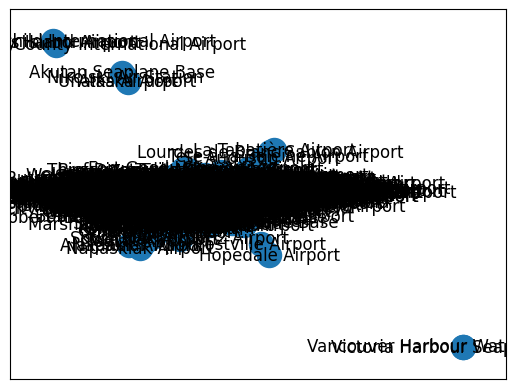

In [114]:
nx.draw_networkx(Geographical_map)

In [115]:
source_airport_set = set(df['SourceAirport'])
destination_airport_set = set(df['DestinationAirport'])

In [116]:
destination_airport_set.update(source_airport_set)

In [117]:
nodes = list(destination_airport_set)

In [118]:
parameter = []

In [119]:
min_items_list = list(df.min())
max_items_list = list(df.max())

In [120]:
for i in range(len(distance_dict)):
    distance_dict[i] = (distance_dict[i] - min_items_list[13]) / (max_items_list[13] - min_items_list[13])
    SourceAirport_Latitude_dict[i] = (SourceAirport_Latitude_dict[i] - min_items_list[5]) / (max_items_list[5] - min_items_list[5])
    SourceAirport_Altitude_dict[i] = (SourceAirport_Altitude_dict[i] - min_items_list[7]) / (max_items_list[7] - min_items_list[7])
    SourceAirport_Longitude_dict[i] = (SourceAirport_Longitude_dict[i] - min_items_list[6]) / (max_items_list[6] - min_items_list[6])
    DestinationAirport_Latitude_dict[i] = (DestinationAirport_Latitude_dict[i] - min_items_list[10]) / (max_items_list[10] - min_items_list[10])
    DestinationAirport_Altitude_dict[i] = (DestinationAirport_Altitude_dict[i] - min_items_list[12]) / (max_items_list[12] - min_items_list[12])
    DestinationAirport_Longitude_dict[i] = (DestinationAirport_Longitude_dict[i] - min_items_list[11]) / (max_items_list[11] - min_items_list[11])
    FlyTime_dict[i] = (FlyTime_dict[i] - min_items_list[14]) / (max_items_list[14] - min_items_list[14])
    Price_dict[i] = (Price_dict[i] - min_items_list[15]) / (max_items_list[15] - min_items_list[15])    

In [121]:
for i in DestinationAirport_Longitude_dict:
    golabi = math.sqrt((math.pow(DestinationAirport_Latitude_dict[i] - SourceAirport_Latitude_dict[i], 2)) + 
    (math.pow(DestinationAirport_Altitude_dict[i] - SourceAirport_Altitude_dict[i], 2)) +
    (math.pow(DestinationAirport_Longitude_dict[i] - SourceAirport_Longitude_dict[i], 2)))

    parameter.append(golabi + FlyTime_dict[i] + Price_dict[i] + distance_dict[i])

In [122]:
init_graph = {}
for node in nodes:
    init_graph[node] = {}

for i in source_airport_dict:
    init_graph[source_airport_dict[i]][destination_airport_dict[i]] = parameter[i]

In [123]:
def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
   
    shortest_path = {}
    
    previous_nodes = {}
    
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value  
    shortest_path[start_node] = 0
    
    while unvisited_nodes:
        current_min_node = None
        for node in unvisited_nodes:
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                previous_nodes[neighbor] = current_min_node
 
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path

In [124]:
def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
    path.append(start_node)
    
    print("We found the following best path with a value of {}.".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path)))

In [125]:
graph = Graph(nodes, init_graph)
previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="Los Angeles International Airport")
print_result(previous_nodes, shortest_path, start_node="Los Angeles International Airport", target_node="Imam Khomeini International Airport")

NameError: name 'Graph' is not defined

In [126]:
golabi = math.sqrt((math.pow(DestinationAirport_Latitude_dict[i] - SourceAirport_Latitude_dict[i], 2)) + 
    (math.pow(DestinationAirport_Altitude_dict[i] - SourceAirport_Altitude_dict[i], 2)) +
    (math.pow(DestinationAirport_Longitude_dict[i] - SourceAirport_Longitude_dict[i], 2)))

In [144]:
def h(src, des_latitude, des_longitude):

    df2 = df[df['SourceAirport'] == src]
    src_lat_list = list(set(df2['SourceAirport_Latitude']))
    src_long_list = list(set(df2['SourceAirport_Longitude']))
    
    radian = math.pi / 180
    radius = 6371
    golabi = math.acos(math.sin(des_latitude * radian) * (math.sin(src_lat_list[0] * radian)) + (math.cos(des_latitude * radian)) * (math.cos(src_lat_list[0] * radian)) * (math.cos((des_longitude * radian) - (src_long_list[0] * radian)))) * radius 
                    
    return golabi
    
def a_star_algorithm(src, des):
    
    open_lst = set([src])
    closed_lst = set([])
    
    g = {}
    g[src] = 0
 
    parent = {}
    parent[src] = src

    df3 = df[df['DestinationAirport'] == des]
    des_lat_list = list(set(df3['DestinationAirport_Latitude']))
    des_long_list = list(set(df3['DestinationAirport_Longitude']))
    
    while len(open_lst) > 0:
        n = None
     
        for v in open_lst:
            df2 = df[df['SourceAirport'] == v]
            src_lat_list = list(set(df2['SourceAirport_Latitude']))
            src_long_list = list(set(df2['SourceAirport_Longitude']))
            
            if n == None or g[v] + h(v, des_lat_list[0], des_long_list[0]) < g[n] + h(n, des_lat_list[0], des_long_list[0]):
                n = v;
        if n == None:
            print('Path does not exist!')
            return None
        if n == des:
            path = []
 
            while parent[n] != n:
                path.append(n)
                n = parent[n]
 
            path.append(src)
            path.reverse()
 
            print('Path found: {}'.format(path))
            return path
 
        for (m, weight) in init_graph[n].items():
            if m not in open_lst and m not in closed_lst:
                open_lst.add(m)
                parent[m] = n
                g[m] = g[n] + weight
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parent[m] = n
 
                    if m in closed_lst:
                        closed_lst.remove(m)
                        open_lst.add(m)
        open_lst.remove(n)
        closed_lst.add(n)
 
    print('Path does not exist!')
    return None

In [145]:
a = a_star_algorithm("Los Angeles International Airport", "Imam Khomeini International Airport")

Path found: ['Los Angeles International Airport', 'Dubai International Airport', 'Imam Khomeini International Airport']


In [140]:
df2

,Airline,SourceAirport,DestinationAirport,SourceAirport_City,SourceAirport_Country,SourceAirport_Latitude,SourceAirport_Longitude,SourceAirport_Altitude,DestinationAirport_City,DestinationAirport_Country,DestinationAirport_Latitude,DestinationAirport_Longitude,DestinationAirport_Altitude,Distance,FlyTime,Price
9,Turkish Airlines,Los Angeles International Airport,Atatürk International Airport,Los Angeles,United States,33.942501,-118.407997,125,Istanbul,Turkey,40.976898,28.814600,163,11034.235275,14.691602,1113.097787
84,United Airlines,Los Angeles International Airport,John F Kennedy International Airport,Los Angeles,United States,33.942501,-118.407997,125,New York,United States,40.639801,-73.778900,13,3974.196711,5.371871,459.721013
139,Emirates,Los Angeles International Airport,Dubai International Airport,Los Angeles,United States,33.942501,-118.407997,125,Dubai,United Arab Emirates,25.252800,55.364399,62,13400.077028,17.187512,1381.640470
352,China Airlines,Los Angeles International Airport,Hartsfield Jackson Atlanta International Airport,Los Angeles,United States,33.942501,-118.407997,125,Atlanta,United States,33.636700,-84.428101,1026,3125.776526,4.380697,381.836163
516,United Airlines,Los Angeles International Airport,Washington Dulles International Airport,Los Angeles,United States,33.942501,-118.407997,125,Washington,United States,38.944500,-77.455803,312,3674.030177,4.600702,441.467235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,Allegiant Air,Los Angeles International Airport,Bellingham International Airport,Los Angeles,United States,33.942501,-118.407997,125,Bellingham,United States,48.792801,-122.538002,170,1686.196358,2.510610,227.950019
6513,Allegiant Air,Los Angeles International Airport,Provo Municipal Airport,Los Angeles,United States,33.942501,-118.407997,125,Provo,United States,40.219200,-111.723000,4497,915.255980,1.991196,147.827575
6588,Great Lakes Airlines,Los Angeles International Airport,Merced Regional Macready Field,Los Angeles,United States,33.942501,-118.407997,125,Merced,United States,37.284698,-120.514000,155,417.526985,0.813562,81.025566
6589,Great Lakes Airlines,Los Angeles International Airport,Ernest A. Love Field,Los Angeles,United States,33.942501,-118.407997,125,Prescott,United States,34.654499,-112.419998,5045,555.636318,1.574945,103.348772


In [139]:
 anghezi = list(set(df2['SourceAirport_Latitude']))
anghezi

[33.94250107]